<a href="https://colab.research.google.com/github/rahmanaul/Wholesale-GMM/blob/master/Salinan_dari_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,2,3,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,2,3,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0
3,1,3,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,2,3,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0


Attribute Information:

FRESH: annual spending (m.u.) on fresh products (Continuous)
MILK: annual spending (m.u.) on milk products (Continuous)
GROCERY: annual spending (m.u.)on grocery products (Continuous)
FROZEN: annual spending (m.u.)on frozen products (Continuous)
DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous)
CHANNEL: customers Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)
REGION: customers Region Lisbon, Pporto or Other (Nominal)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Channel           500 non-null    int64  
 1   Region            500 non-null    int64  
 2   Fresh             496 non-null    float64
 3   Milk              495 non-null    float64
 4   Grocery           496 non-null    float64
 5   Frozen            495 non-null    float64
 6   Detergents_Paper  495 non-null    float64
 7   Delicassen        496 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 31.4 KB


In [ ]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,500.000000,500.000000,4.960000e+02,4.950000e+02,4.960000e+02,4.950000e+02,4.950000e+02,4.960000e+02
mean,1.404000,2.418000,1.806676e+04,1.851574e+04,1.833829e+04,6.321590e+04,1.667034e+04,9.540163e+03
std,0.491189,0.820135,1.140949e+05,2.480502e+05,1.989876e+05,1.058266e+06,1.928313e+05,1.169039e+05
min,1.000000,1.000000,-1.732700e+04,-2.022300e+04,-2.157000e+04,-5.679000e+03,-1.178300e+04,-6.200000e+01
25%,1.000000,2.000000,2.855250e+03,1.532000e+03,2.146750e+03,6.595000e+02,2.650000e+02,3.750000e+02
50%,1.000000,3.000000,7.774500e+03,3.587000e+03,4.683500e+03,1.483000e+03,8.250000e+02,9.250000e+02
75%,2.000000,3.000000,1.630700e+04,7.051000e+03,1.041100e+04,3.559500e+03,3.909000e+03,1.824750e+03
max,2.000000,3.000000,2.337588e+06,5.433446e+06,4.323643e+06,2.323139e+07,3.232825e+06,2.321522e+06


In [ ]:
data.isnull().sum()

Channel             0
Region              0
Fresh               4
Milk                5
Grocery             4
Frozen              5
Detergents_Paper    5
Delicassen          4
dtype: int64

In [ ]:
data = data.dropna(how='any',axis=0)
# Check for null values
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

**Outlier**

In [ ]:
data = data[(data > 0).all(1)]
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
test1 = data < (Q1 - 1.5 * IQR)
test2 = data > (Q3 + 1.5 * IQR)
data1 = data[~((data < (Q1-1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,456.000000,456.000000,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02,4.560000e+02
mean,1.348684,2.517544,1.913024e+04,1.979596e+04,1.949698e+04,6.833089e+04,1.794044e+04,1.018073e+04
std,0.477077,0.772977,1.189112e+05,2.584089e+05,2.074906e+05,1.102534e+06,2.008719e+05,1.218944e+05
min,1.000000,1.000000,2.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00
25%,1.000000,2.000000,3.082000e+03,1.483250e+03,2.127000e+03,6.842500e+02,2.557500e+02,4.047500e+02
50%,1.000000,3.000000,8.257500e+03,3.611500e+03,4.755500e+03,1.510500e+03,8.205000e+02,9.605000e+02
75%,2.000000,3.000000,1.693375e+04,7.190250e+03,1.065575e+04,3.590750e+03,4.003250e+03,1.820250e+03
max,2.000000,3.000000,2.337588e+06,5.433446e+06,4.323643e+06,2.323139e+07,3.232825e+06,2.321522e+06


In [ ]:
data.shape

(456, 8)

In [ ]:
data.dtypes

Channel               int64
Region                int64
Fresh               float64
Milk                float64
Grocery             float64
Frozen              float64
Detergents_Paper    float64
Delicassen          float64
dtype: object

In [ ]:
# Replace the number of the Region column with the corresponded name
data1['Region'] = data1['Region'].map({1: 'Lisbon', 2: 'Porto', 3: 'Other Region'})

# Replace the number of the Channel column with the corresponded name
data1['Channel'] = data1['Channel'].map({1: 'Horeca', 2: 'Retail'})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
data1.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,Retail,Other Region,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,Retail,Other Region,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
3,Horeca,Other Region,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
5,Retail,Other Region,9413.0,8259.0,5126.0,666.0,1795.0,1451.0
6,Retail,Other Region,12126.0,3199.0,6975.0,480.0,3140.0,545.0


In [ ]:
data1['Total'] = data1.iloc[:,2:].sum(axis = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data1.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total
0,Retail,Other Region,12669.0,9656.0,7561.0,214.0,2674.0,1338.0,34112.0
1,Retail,Other Region,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0,33266.0
3,Horeca,Other Region,13265.0,1196.0,4221.0,6404.0,507.0,1788.0,27381.0
5,Retail,Other Region,9413.0,8259.0,5126.0,666.0,1795.0,1451.0,26710.0
6,Retail,Other Region,12126.0,3199.0,6975.0,480.0,3140.0,545.0,26465.0


In [ ]:
x = data1.iloc[:, 2:-2].sum(axis = 0)
x

Fresh               3205496.0
Milk                1384299.0
Grocery             1973522.0
Frozen               634237.0
Detergents_Paper     657399.0
dtype: float64

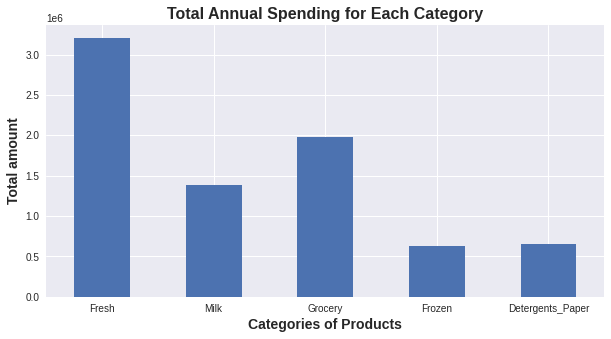

In [ ]:
# Plotting the results
plt.style.use('seaborn')
plt.figure(figsize=(10,5))

x.plot(kind = 'bar')
plt.xlabel('Categories of Products', fontdict={'fontweight': 'bold', 'fontsize': 14})
plt.ylabel('Total amount', fontdict={'fontweight': 'bold', 'fontsize': 14})
plt.title('Total Annual Spending for Each Category', fontdict={'fontweight': 'bold', 'fontsize': 16})
plt.xticks(rotation = 0)

plt.tight_layout
plt.show()

In [ ]:
t = data1.sort_values('Total', ascending = False).head(10)
t

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total
12,Retail,Other Region,31714.0,12319.0,11757.0,287.0,3881.0,2931.0,62889.0
165,Retail,Other Region,15615.0,12653.0,19858.0,4425.0,7108.0,2379.0,62038.0
393,Horeca,Other Region,34454.0,7435.0,8469.0,2540.0,1711.0,2893.0,57502.0
253,Horeca,Lisbon,29526.0,7961.0,16966.0,432.0,363.0,1391.0,56639.0
142,Horeca,Other Region,37036.0,7152.0,8253.0,2995.0,20.0,3.0,55459.0
347,Retail,Other Region,27380.0,7184.0,12311.0,2809.0,4621.0,1022.0,55327.0
14,Retail,Other Region,24653.0,9465.0,12091.0,294.0,5058.0,2168.0,53729.0
13,Retail,Other Region,21217.0,6208.0,14982.0,3095.0,6707.0,602.0,52811.0
335,Retail,Porto,27082.0,6817.0,10790.0,1365.0,4111.0,2139.0,52304.0
306,Retail,Porto,6468.0,12867.0,21570.0,1840.0,7558.0,1543.0,51846.0


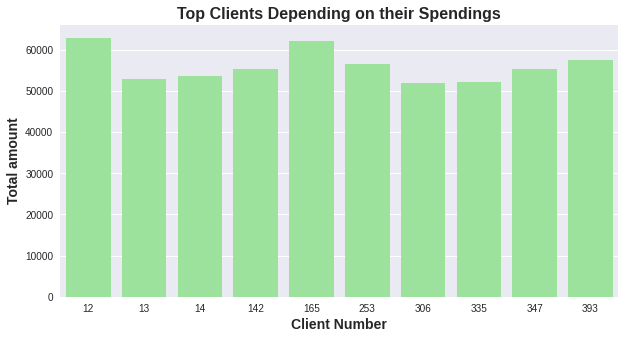

In [ ]:
# Plotting the results
plt.style.use('seaborn')
plt.figure(figsize=(10,5))

sns.barplot(t.index, t.Total, color='lightgreen', errwidth = True)
plt.xlabel('Client Number', fontdict={'fontweight': 'bold', 'fontsize': 14})
plt.ylabel('Total amount', fontdict={'fontweight': 'bold', 'fontsize': 14})
plt.title('Top Clients Depending on their Spendings', fontdict={'fontweight': 'bold', 'fontsize': 16})


plt.tight_layout
plt.show()

Horeca    238
Retail     96
Name: Channel, dtype: int64 



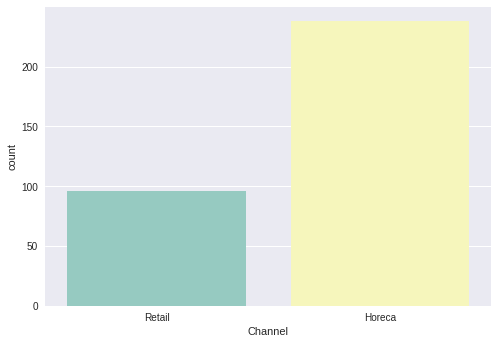

In [ ]:
# Firstly, let's count the channels
print(data1.Channel.value_counts(),'\n')

# Plotting
sns.countplot('Channel', data = data1, palette='Set3')
plt.show()

Channel
Horeca    4860465.0
Retail    3335670.0
Name: Total, dtype: float64 



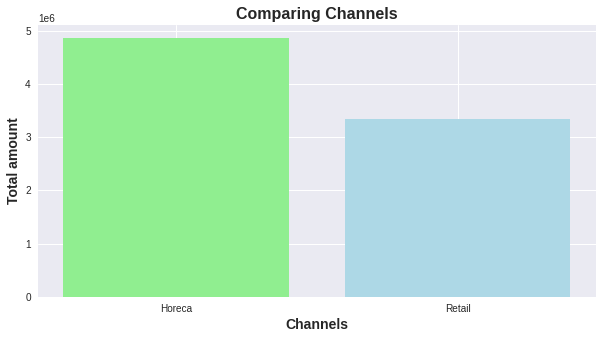

In [ ]:
c = data1.groupby('Channel')['Total'].sum()
print(c,'\n')

plt.figure(figsize=(10,5))

plt.bar(c.index,c, color = ['lightgreen','lightblue'])
plt.xlabel('Channels', fontdict={'fontweight': 'bold', 'fontsize': 14})
plt.ylabel('Total amount', fontdict={'fontweight': 'bold', 'fontsize': 14})
plt.title('Comparing Channels', fontdict={'fontweight': 'bold', 'fontsize': 16})


plt.tight_layout
plt.show()

In [ ]:
data1.Region.value_counts()

Other Region    240
Lisbon           60
Porto            34
Name: Region, dtype: int64

In [ ]:
r = data1.groupby(['Region','Channel']).size()
r

Region        Channel
Lisbon        Horeca      51
              Retail       9
Other Region  Horeca     164
              Retail      76
Porto         Horeca      23
              Retail      11
dtype: int64

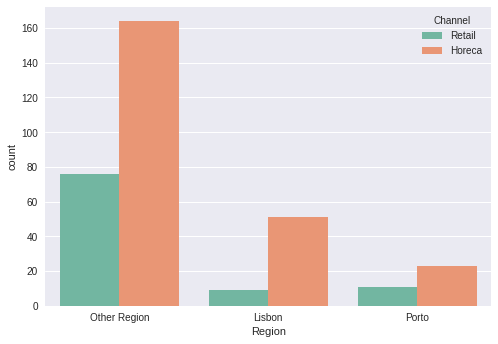

In [ ]:
# Plotting
sns.countplot('Region', hue = 'Channel', data = data1, palette='Set2')
plt.show()

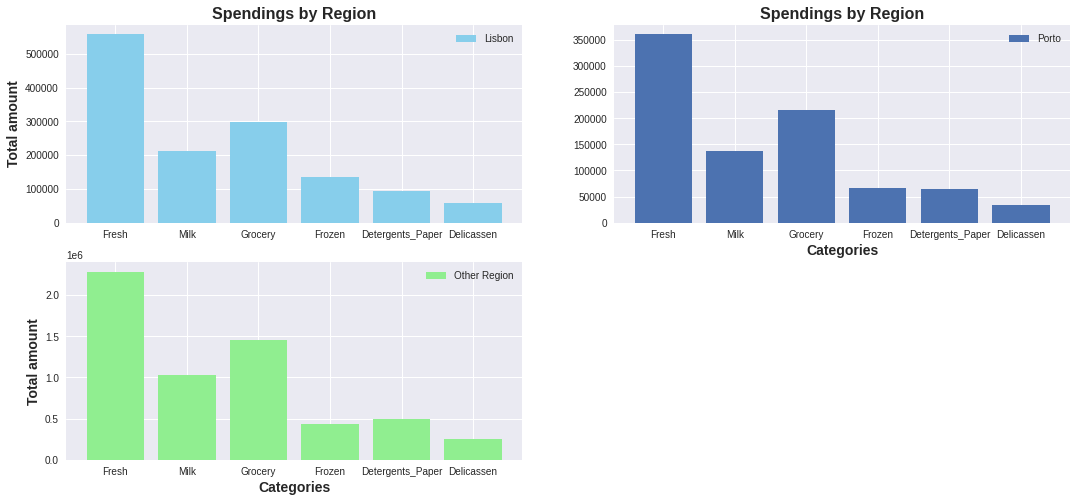

In [ ]:
lisbon = data1[data1.Region == 'Lisbon']
l = lisbon.iloc[:,2:-1].sum(axis = 0)

porto = data1[data1.Region == 'Porto']
p = porto.iloc[:,2:-1].sum(axis = 0)

other = data1[data1.Region == 'Other Region']
o = other.iloc[:,2:-1].sum(axis = 0)

# Plotting
plt.figure(figsize=(18,8))

plt.subplot(2, 2, 1)
plt.bar(l.index,l, color = ['skyblue'])
#plt.xlabel('Categories', fontdict={'fontweight': 'bold', 'fontsize': 14})
plt.ylabel('Total amount', fontdict={'fontweight': 'bold', 'fontsize': 14})
plt.title('Spendings by Region', fontdict={'fontweight': 'bold', 'fontsize': 16})
plt.legend(['Lisbon'])

plt.subplot(2, 2, 2)
plt.bar(p.index,p)
plt.xlabel('Categories', fontdict={'fontweight': 'bold', 'fontsize': 14})
#plt.ylabel('Total amount', fontdict={'fontweight': 'bold', 'fontsize': 14})
plt.title('Spendings by Region', fontdict={'fontweight': 'bold', 'fontsize': 16})
plt.legend(['Porto'])

plt.subplot(2, 2, 3)
plt.bar(o.index,o, color = 'lightgreen')
plt.xlabel('Categories', fontdict={'fontweight': 'bold', 'fontsize': 14})
plt.ylabel('Total amount', fontdict={'fontweight': 'bold', 'fontsize': 14})
#plt.title('Spendings by Region', fontdict={'fontweight': 'bold', 'fontsize': 16})
plt.legend(['Other Region'])


plt.tight_layout
plt.show()